In [1]:
import json 
import numpy as np 
import pandas as pd 

In [2]:
pwd

'/app/timeseries/multiclass_src/notebooks'

# 1. Reading in from eval json

In [43]:
def load_eval_json(eval_file): 
    results_path = "/app/timeseries/multiclass_src/results/new_runs"
    output_file = eval_file
    fp = "/".join([results_path, output_file])
    with open(fp, "r+") as f: 
        results = json.load(f)
    return results 

In [45]:
af1_results = load_eval_json(eval_file="20201208_approxf1_eval.json")
ce_results = load_eval_json(eval_file="20201208_ce_eval.json")

In [51]:
def aggregate_runs(results_json): 
    '''Assuming each input is an array of JSONs that all have the same shape
    This aggregates an array of jsons together into a singular one, based on the set fields below
    '''
    eval_json = {}
    eval_taus = ['0.1', '0.2', '0.3', '0.4', '0.45', '0.5', '0.55', '0.6', '0.7', '0.8', '0.9']
    for tau in eval_taus: 
        eval_json[str(tau)] = {}
        eval_json[str(tau)]['mean_f1'] =  np.mean([x[str(tau)]['mean_f1'] for x in results_json])
        class_f1s = [x[str(tau)]['class_f1s'] for x in results_json]
        eval_json[str(tau)]['class_f1s'] = np.mean(class_f1s, axis=0)
        
        class_pr = [x[str(tau)]['class_precisions'] for x in results_json]
        eval_json[str(tau)]['class_precisions'] = np.mean(class_pr, axis=0)
        eval_json[str(tau)]['mean_pr'] = np.mean(eval_json[str(tau)]['class_precisions'])
        
        class_re = [x[str(tau)]['class_recalls'] for x in results_json]
        eval_json[str(tau)]['class_recalls'] = np.mean(class_re, axis=0)
        eval_json[str(tau)]['mean_re'] = np.mean(eval_json[str(tau)]['class_recalls'])
    return eval_json 

In [52]:
af1_agg = aggregate_runs(af1_results)
ce_agg = aggregate_runs(ce_results)

In [53]:
af1_agg

{'0.1': {'mean_f1': 0.5531592726707458,
  'class_f1s': array([0.61879926, 0.56182359, 0.50827692, 0.41847319, 0.51048872,
         0.50110418, 0.60664804, 0.64652891, 0.67889861, 0.48055162]),
  'class_precisions': array([0.61984488, 0.5279833 , 0.46766059, 0.30474364, 0.43659647,
         0.46155666, 0.59559245, 0.64908643, 0.66594822, 0.72423332]),
  'mean_pr': 0.5453245952725411,
  'class_recalls': array([0.61818694, 0.60428039, 0.56385441, 0.67031993, 0.61761972,
         0.55334861, 0.62231973, 0.64480671, 0.69450589, 0.36081634]),
  'mean_re': 0.5950058668851852},
 '0.2': {'mean_f1': 0.557438063621521,
  'class_f1s': array([0.6578041 , 0.60989393, 0.47171282, 0.43299866, 0.49789487,
         0.56540588, 0.62110068, 0.53474268, 0.69947811, 0.48334907]),
  'class_precisions': array([0.65428259, 0.55875041, 0.4551529 , 0.32987937, 0.48087987,
         0.51722443, 0.59327543, 0.54961643, 0.71729566, 0.82680935]),
  'mean_pr': 0.5683166444301606,
  'class_recalls': array([0.66227497, 

In [55]:
af1_f1s = [af1_agg[x]['mean_f1'] for x in af1_agg]
af1_pr = [af1_agg[x]['mean_pr'] for x in af1_agg]
af1_re = [af1_agg[x]['mean_re'] for x in af1_agg]
ce_f1s = [ce_agg[x]['mean_f1'] for x in ce_agg]
ce_pr = [ce_agg[x]['mean_pr'] for x in ce_agg]
ce_re = [ce_agg[x]['mean_re'] for x in ce_agg]

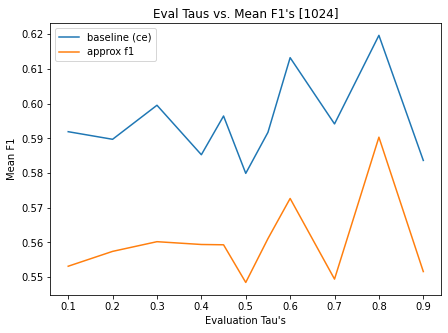

In [49]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_f1s, label="baseline (ce)")
plt.plot(taus, af1_f1s, label="approx f1")
plt.title("Eval Taus vs. Mean F1's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()

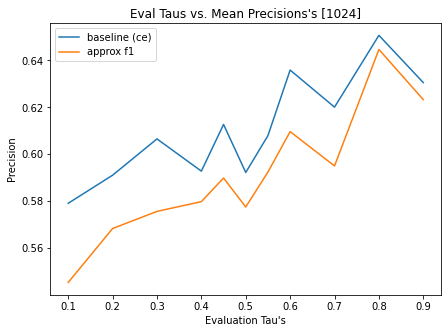

In [57]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_pr, label="baseline (ce)")
plt.plot(taus, af1_pr, label="approx f1")
plt.title("Eval Taus vs. Mean Precisions's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Precision")
plt.legend()
plt.show()

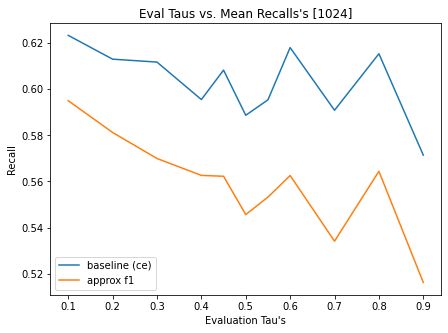

In [59]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_re, label="baseline (ce)")
plt.plot(taus, af1_re, label="approx f1")
plt.title("Eval Taus vs. Mean Recalls's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Recall")
plt.legend()
plt.show()

# SearchTau Analysis